Plotting a Simple Sphere

Step 1: Load necessary libraries \
Step 2: Define Sphere (Radius, theta, and phi angles) \
Step 3: Create Figure and 3D Plot \
Step 4: Add Title and Labels \
Step 5: Display Plot 

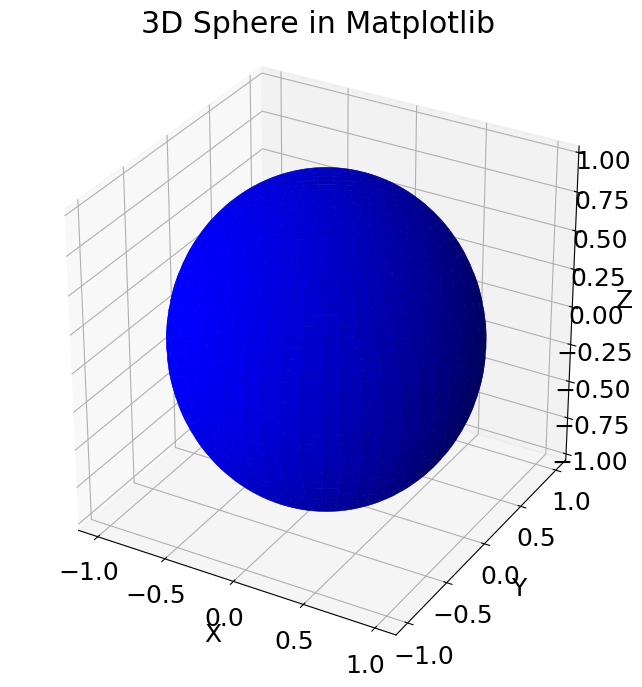

In [39]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Sphere
radius_sphere = 1
theta_sphere = np.linspace(0,2.*np.pi,100)
phi_sphere = np.linspace(0,np.pi,100)

# Convert to Cartesian Coordinates
x_sphere = radius_sphere * np.outer(np.cos(theta_sphere),np.sin(phi_sphere))
y_sphere = radius_sphere * np.outer(np.sin(theta_sphere),np.sin(phi_sphere))
z_spehre = radius_sphere * np.outer(np.ones(np.size(theta_sphere)),np.cos(phi_sphere))
# Create a 3D plot
fig = plt.figure(1)
ax_sphere = fig.add_subplot(111, projection='3d')

# Plot the sphere
ax_sphere.plot_surface(x_sphere, y_sphere, z_spehre, color='b')

# Add title and labels
ax_sphere.set_title("3D Sphere in Matplotlib")
ax_sphere.set_xlabel("X")
ax_sphere.set_ylabel("Y")
ax_sphere.set_zlabel("Z")

# Adjust aspect ratio
ax_sphere.set_box_aspect([1,1,1])

# Display the plot
plt.show()



In [40]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#Create Rotation Angles
theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
print("Size of Matrix theta: " + str(len(theta)))
print("theta =")
print(theta)

#Create Scaling Factors for x, y, z
Sigma = np.diag([3,1,0.5])
print("Size of Matrix Sigma: " + str(Sigma.shape))
print("Sigma =")
print(Sigma)

#Rotate about x axis
Rx = np.array([[1,0,0],
               [0,np.cos(theta[0]),-np.sin(theta[0])],
               [0,np.sin(theta[0]),np.cos(theta[0])]])
print("Size of Matrix Rx: " + str(Rx.shape))
print("Rx =")
print(Rx)

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])
print("Size of Matrix Ry: " + str(Ry.shape))
print("Ry =")
print(Ry)

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])
print("Size of Matrix Rz: " + str(Rz.shape))
print("Rz =")
print(Rz)


Size of Matrix theta: 3
theta =
[ 0.20943951 -0.34906585 -0.15707963]
Size of Matrix Sigma: (3, 3)
Sigma =
[[3.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]
Size of Matrix Rx: (3, 3)
Rx =
[[ 1.          0.          0.        ]
 [ 0.          0.9781476  -0.20791169]
 [ 0.          0.20791169  0.9781476 ]]
Size of Matrix Ry: (3, 3)
Ry =
[[ 0.93969262  0.         -0.34202014]
 [ 0.          1.          0.        ]
 [ 0.34202014  0.          0.93969262]]
Size of Matrix Rz: (3, 3)
Rz =
[[ 0.98768834  0.15643447  0.        ]
 [-0.15643447  0.98768834  0.        ]
 [ 0.          0.          1.        ]]


In [41]:
# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma
print("Size of Matrix X: " + str(X.shape))
print("X =")
print(X)

Size of Matrix X: (3, 3)
X =
[[ 2.78437034  0.08278149 -0.18147596]
 [-0.44100094  0.97722903 -0.0765087 ]
 [ 1.02606043  0.19537308  0.45957904]]


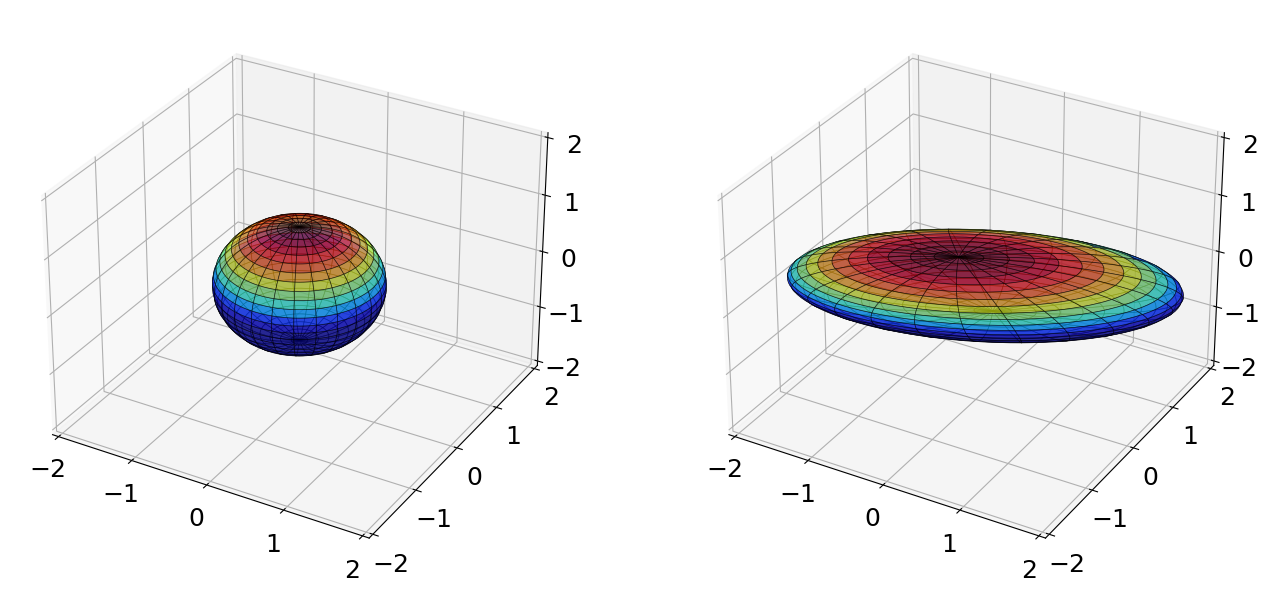

In [42]:
# Plot sphere
fig = plt.figure(2)
ax1 = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]
        
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()

Note the Values of the Matrices from the SVD: \
$\sigma $ contains the Scale Factors \
$U$ contains rotation matrixes $R_{x},R_{y},R_{z}$

In [43]:
# Compute SVD
U,S,VT = np.linalg.svd(X,full_matrices=False)
print("Size of Matrix U: " + str(U.shape))
print("U =")
print(U)
print("Size of Matrix S: " + str(S.shape))
print("S =")
print(S)
print("Size of Matrix VT: " + str(VT.shape))
print("VT =")
print(VT)

X = U @ np.diag(S)
print("Size of Matrix X: " + str(X.shape))
print("X =")
print(X)


Size of Matrix U: (3, 3)
U =
[[-0.92812345  0.08278149 -0.36295192]
 [ 0.14700031  0.97722903 -0.1530174 ]
 [-0.34202014  0.19537308  0.91915808]]
Size of Matrix S: (3,)
S =
[3.  1.  0.5]
Size of Matrix VT: (3, 3)
VT =
[[-1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
Size of Matrix X: (3, 3)
X =
[[-2.78437034  0.08278149 -0.18147596]
 [ 0.44100094  0.97722903 -0.0765087 ]
 [-1.02606043  0.19537308  0.45957904]]


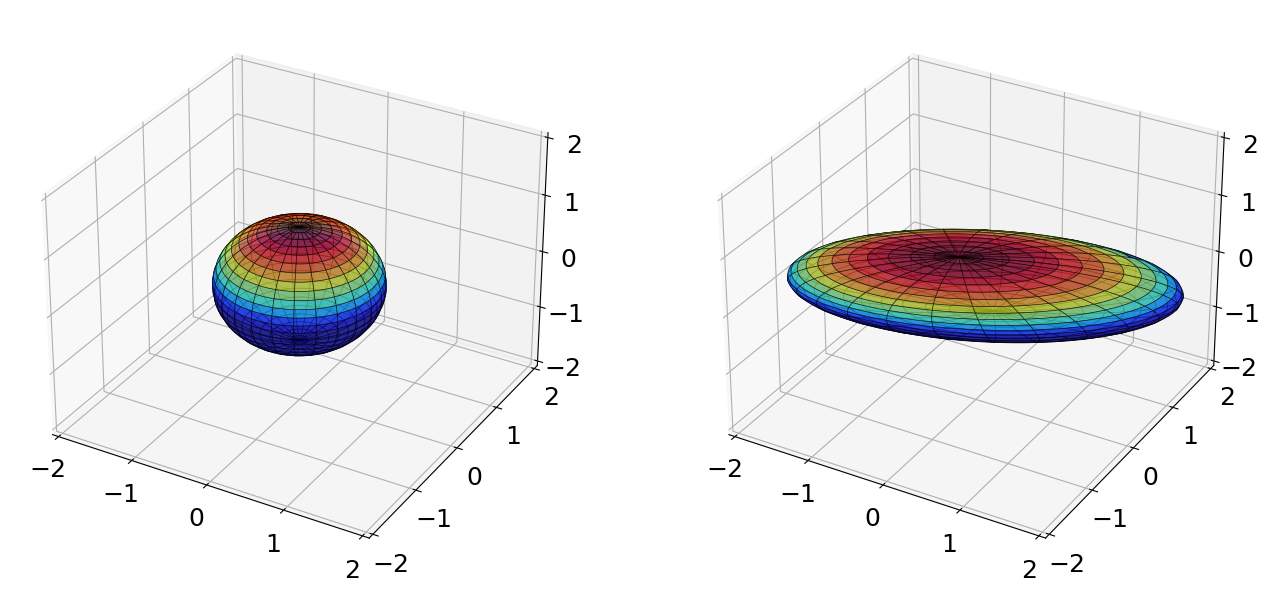

In [44]:
# Plot sphere
fig = plt.figure(3)
ax1 = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]
        
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()